# Improving Model

### 3 Ways of tuning hyperparameters:
1. by hand
2. RandomizedSearchCV
3. GridSearchCV

In [53]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('./Data/heart-disease.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

#### 1. Tuning Hyper Parameter By Hand

In [54]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [55]:
np.random.seed(42)

# Shuffle the data
heart_disease = heart_disease.sample(frac=1)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_test, y_pred)
baseline_metrics

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [56]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_test)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_test, y_preds_2)

Acc: 85.25%
Precision: 0.90
Recall: 0.81
F1 score: 0.85


#### 2. Tuning hyperparameter using `RandomizedSearchCV`

In [57]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features':['sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}


clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=0)

rs_clf.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]})

In [58]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [59]:
rs_pred = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_pred)
rs_metrics

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

#### 3. Tuning Hyperparameters using `GridSearchCV`

In [60]:
grid_2 = {'n_estimators': [100,200,500],
        'max_depth': [None,5],
        'max_features':['sqrt'],
        'min_samples_split':[4,6],
        'min_samples_leaf':[2,4]}

In [62]:
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=1)

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [63]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [64]:
gs_pred = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_pred)
gs_metrics

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

<Axes: >

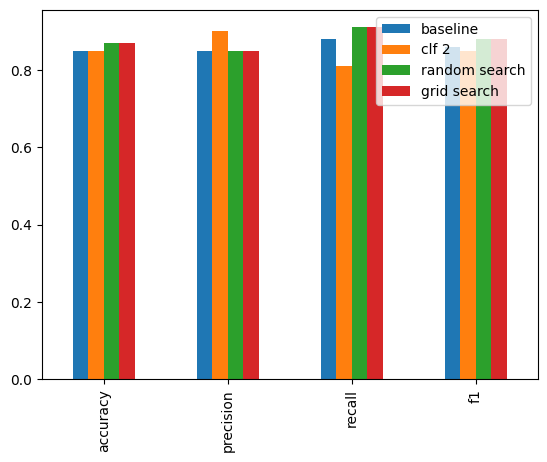

In [65]:
compare = pd.DataFrame({'baseline': baseline_metrics,
                       'clf 2': clf_2_metrics,
                       'random search':rs_metrics,
                       'grid search': gs_metrics}
                       )

compare.plot.bar()

In [66]:
compare

,baseline,clf 2,random search,grid search
accuracy,0.85,0.85,0.87,0.87
precision,0.85,0.90,0.85,0.85
recall,0.88,0.81,0.91,0.91
f1,0.86,0.85,0.88,0.88
